In [1]:
# General-purpose libraries
import numpy as np
import warnings

# Data processing and transformation
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter

# Model and decomposition
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

# Handle warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_excel("data/Column_database.xlsx")

# Preview the first few rows of the dataset
print(data.head())

           Reference Specimen  Failure   a/D       ALF   ρlfy/fc  ρvfyv/ft  \
0         Davey 1975    No. 1        1  5.50  0.055265  0.288491  0.368768   
1                NaN    No. 2        1  3.50  0.052724  0.273751  0.360191   
2                NaN    No. 3        1  6.50  0.054284  0.283370  0.400623   
3  Munro et al. 1976    No. 1        1  5.46  0.003187  0.195795  1.213041   
4     Ng et al. 1978    No. 2        1  5.36  0.011396  0.222759  1.289995   

   Unnamed: 7 Unnamed: 8                                         Unnamed: 9  
0         NaN        NaN                                                NaN  
1         NaN       Note  Test configuration: C = cantilever, DC = doubl...  
2         NaN        NaN                                                NaN  
3         NaN        NaN  # flexure columns = 221 (represented as 1 in F...  
4         NaN        NaN              # flexure-shear columns = 53 (FS - 2)  


In [3]:
# Drop unnecessary columns
data = data.drop(columns=['Reference', 'Specimen', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'])

# Drop rows with missing values for simplicity (you can also consider imputation methods)
data = data.dropna()

# Separate features and target variable
X = data[['a/D', 'ALF', 'ρlfy/fc', 'ρvfyv/ft']]
y = data['Failure']

print(X.head())
print(y.head())


    a/D       ALF   ρlfy/fc  ρvfyv/ft
0  5.50  0.055265  0.288491  0.368768
1  3.50  0.052724  0.273751  0.360191
2  6.50  0.054284  0.283370  0.400623
3  5.46  0.003187  0.195795  1.213041
4  5.36  0.011396  0.222759  1.289995
0    1
1    1
2    1
3    1
4    1
Name: Failure, dtype: int64


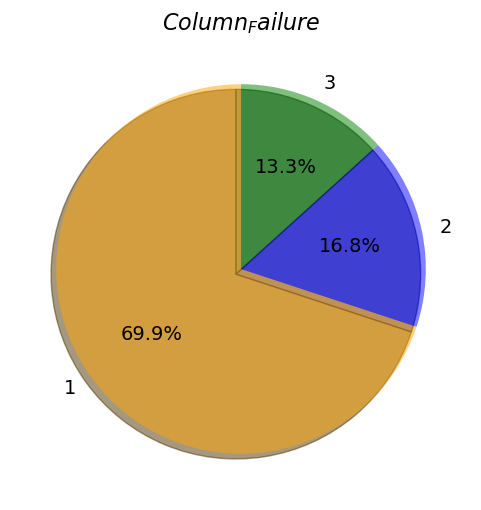

In [6]:
# Preprocessing: Normalize the data using Min-Max scaling
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)  # X_normalized

# Define labels and colormap for plotting
labels = ['Flexure (1)', 'Flexure-Shear(2)', 'Shear(3)']
cm_bright = ListedColormap(['#FFA500', '#0000FF', '#008000'])

# Creating the pie chart to show class distribution
fig, axes = plt.subplots(1, 1, figsize=(11, 6))

# Get unique class labels and their counts
unique_elements, counts_elements = np.unique(y, return_counts=True)

# Plot pie chart
axes.pie(counts_elements, labels=unique_elements, autopct='%1.1f%%', colors=cm_bright.colors, wedgeprops={'alpha':0.5}, shadow=True, startangle=90, textprops={'fontsize':14})
axes.set_title("$Column_Failure$", fontsize=16)

# Show the plot
plt.show()


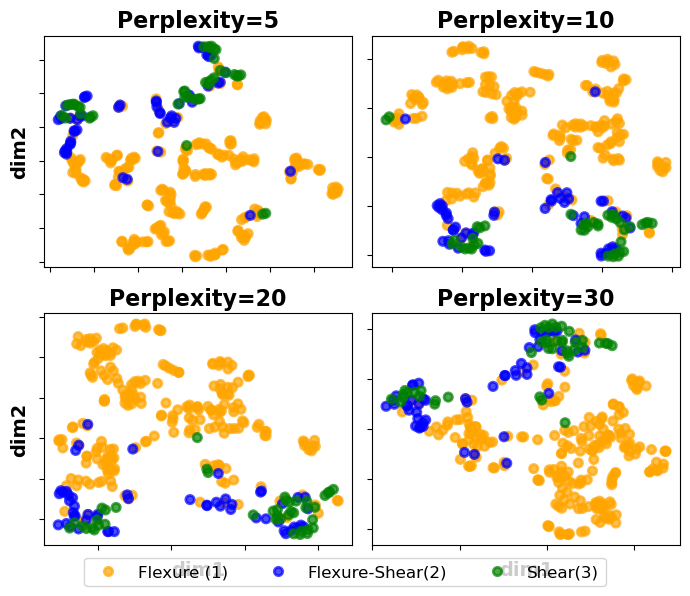

In [7]:
# Create projection using t-SNE with different perplexity values
fig, axes = plt.subplots(2, 2, figsize=(7, 6))

# Define the perplexities for the plots
perplexities = [5, 10, 20, 30]

# Loop through perplexities and generate plots
for i, perplexity in enumerate(perplexities):
    a = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)
    
    row = i // 2
    col = i % 2
    
    scatter = axes[row][col].scatter(a[:, 0], a[:, 1], c=y, alpha=.7, lw=2, cmap=cm_bright)
    axes[row][col].set_title("Perplexity=%d" % perplexity, fontweight='bold', fontsize=16)
    axes[row][col].xaxis.set_major_formatter(NullFormatter())
    axes[row][col].yaxis.set_major_formatter(NullFormatter())

# Set x and y axis labels for the relevant subplots
axes[1][0].set_xlabel("dim1", fontweight='bold', fontsize=14)
axes[1][1].set_xlabel("dim1", fontweight='bold', fontsize=14)
axes[0][0].set_ylabel("dim2", fontweight='bold', fontsize=14)
axes[1][0].set_ylabel("dim2", fontweight='bold', fontsize=14)

# Create a legend common to all subplots, indicating the mapping between class labels and colors
fig.legend(ncol=3, loc='lower center', bbox_to_anchor=(0.5, 0), shadow=False, scatterpoints=1,
           handles=scatter.legend_elements()[0], labels=labels, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


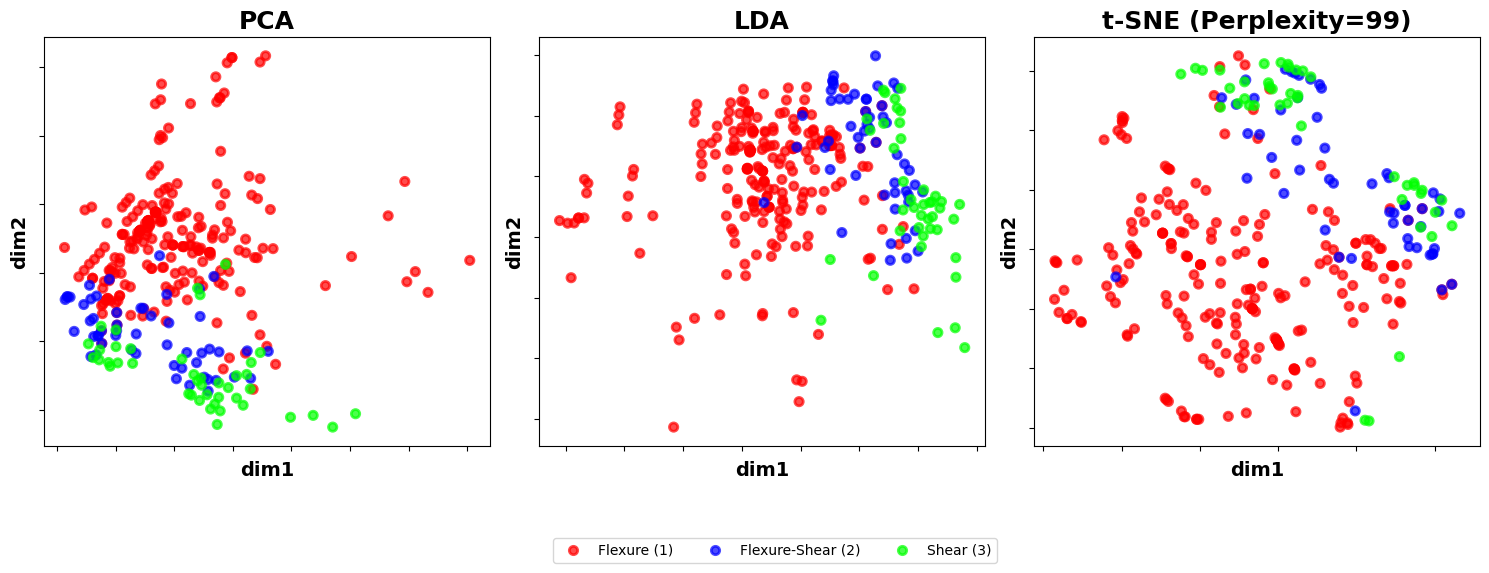

In [8]:
# Apply dimensionality reduction techniques: PCA, LDA, and t-SNE
X_r = PCA(n_components=2).fit_transform(X)
X_r2 = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
X_r3 = TSNE(n_components=2, perplexity=99).fit_transform(X)

# Define colormap for plotting
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
labels = ['Flexure (1)', 'Flexure-Shear (2)', 'Shear (3)']

# Create subplots to visualize the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot PCA results
axes[0].scatter(X_r[:, 0], X_r[:, 1], c=y, alpha=.7, lw=2, cmap=cm_bright)
axes[0].set_title("PCA", fontweight='bold', fontsize=18)

# Plot LDA results
axes[1].scatter(X_r2[:, 0], X_r2[:, 1], c=y, alpha=.7, lw=2, cmap=cm_bright)
axes[1].set_title("LDA", fontweight='bold', fontsize=18)

# Plot t-SNE results
scatter2 = axes[2].scatter(X_r3[:, 0], X_r3[:, 1], c=y, alpha=.7, lw=2, cmap=cm_bright)
axes[2].set_title("t-SNE (Perplexity=99)", fontweight='bold', fontsize=18)

# General formatting
for ax in axes:
    ax.set_xlabel("dim1", fontweight='bold', fontsize=14)
    ax.set_ylabel("dim2", fontweight='bold', fontsize=14)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

# Add a common legend for all subplots
fig.legend(ncol=3, loc='lower center', bbox_to_anchor=(0.52, -0.15), shadow=False, scatterpoints=1,
           handles=scatter2.legend_elements()[0], labels=labels)

plt.tight_layout()
plt.show()